In [ ]:
!pip install spotipy

In [51]:
import requests
import base64

# Replace with your own Client ID and Client Secret
CLIENT_ID = 'dd93bc8446544397bcf7a99afbc866a9'
CLIENT_SECRET = 'e3bc113b39014708ad2b7017f7f06f7b'

# Base64 encode the client ID and client secret
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token created successfully.")
else:
    print("Error Occured during access token")
    exit()

Access token created successfully.


In [52]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

def playlist_data(playlist_id, access_token):
    # Setting up Spotipy library with the access token
    sp = spotipy.Spotify(auth=access_token)

    # Fetching the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # Extract relevant information and store in a list of dictionaries
    song_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # Get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        #  release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        #  popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Popularity': popularity,
            'Release Date': release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
        }

        song_data.append(track_data)

    # Create a pandas DataFrame from the list of dictionaries
    df = pd.DataFrame(song_data)

    return df



In [53]:
playlist_id = '37i9dQZF1DX8xfQRRX1PDm'

#now calling function to display the playlist
song_df = playlist_data(playlist_id, access_token)

# Displaying  the DataFrame
song_df

,Track Name,Artists,Album Name,Popularity,Release Date,Duration (ms),Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness
0,Thumkeshwari,"Sachin-Jigar, Rashmeet Kaur, Ash King, Divya K...",Bhediya (Original Motion Picture Soundtrack),66,2022-11-22,163179,0.757,0.682,-5.292,1,0.0553,0.0550,0.000000
1,Kala Chashma,"Prem, Hardeep, Amar Arshi, Badshah, Neha Kakka...",Baar Baar Dekho (Original Motion Picture Sound...,69,2016-08-04,187006,0.801,0.856,-4.233,1,0.0650,0.0984,0.000072
2,Teri Baaton Mein Aisa Uljha Jiya Title Song (F...,"Raghav, Tanishk Bagchi, Asees Kaur",Teri Baaton Mein Aisa Uljha Jiya Title Song (F...,73,2024-01-29,153083,0.814,0.819,-3.585,1,0.0454,0.1240,0.000245
3,"What Jhumka ? (From ""Rocky Aur Rani Kii Prem K...","Pritam, Arijit Singh, Jonita Gandhi, Ranveer S...","What Jhumka ? (From ""Rocky Aur Rani Kii Prem K...",69,2023-07-12,213611,0.821,0.823,-5.455,1,0.1000,0.2350,0.000000
4,"Dilbar (From ""Satyameva Jayate"")","Neha Kakkar, Dhvani Bhanushali, Ikka, Tanishk ...","Dilbar (From ""Satyameva Jayate"")",72,2018-07-04,184433,0.725,0.912,-3.665,0,0.0851,0.1550,0.000077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"Coka 2.0 (From ""Liger"")","Jaani, Lijo George-Dj Chetas, Sukh-E Muzical D...","Coka 2.0 (From ""Liger"")",60,2022-08-12,166392,0.743,0.922,-3.025,1,0.1210,0.4110,0.000002
71,Tune Maari Entriyaan,"Sohail Sen, Vishal Dadlani, KK, Neeti Mohan, B...",Gunday,61,2013-12-26,313365,0.794,0.865,-5.333,1,0.2150,0.1490,0.000014
72,Pyaar Hota Kayi Baar Hai,"Pritam, Arijit Singh, Amitabh Bhattacharya, Ch...",Tu Jhoothi Main Makkaar,62,2023-03-16,216271,0.772,0.767,-4.792,1,0.0381,0.1380,0.000000
73,Tere Pyaar Mein,"Pritam, Arijit Singh, Amitabh Bhattacharya, Ni...","Tere Pyaar Mein (From ""Tu Jhoothi Main Makkaar"")",80,2023-02-01,265108,0.679,0.748,-5.487,0,0.0540,0.1110,0.000000


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

data = song_df

song_df.head()

,Track Name,Artists,Album Name,Popularity,Release Date,Duration (ms),Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness
0,Thumkeshwari,"Sachin-Jigar, Rashmeet Kaur, Ash King, Divya K...",Bhediya (Original Motion Picture Soundtrack),66,2022-11-22,163179,0.757,0.682,-5.292,1,0.0553,0.0550,0.000000
1,Kala Chashma,"Prem, Hardeep, Amar Arshi, Badshah, Neha Kakka...",Baar Baar Dekho (Original Motion Picture Sound...,69,2016-08-04,187006,0.801,0.856,-4.233,1,0.0650,0.0984,0.000072
2,Teri Baaton Mein Aisa Uljha Jiya Title Song (F...,"Raghav, Tanishk Bagchi, Asees Kaur",Teri Baaton Mein Aisa Uljha Jiya Title Song (F...,73,2024-01-29,153083,0.814,0.819,-3.585,1,0.0454,0.1240,0.000245
3,"What Jhumka ? (From ""Rocky Aur Rani Kii Prem K...","Pritam, Arijit Singh, Jonita Gandhi, Ranveer S...","What Jhumka ? (From ""Rocky Aur Rani Kii Prem K...",69,2023-07-12,213611,0.821,0.823,-5.455,1,0.1000,0.2350,0.000000
4,"Dilbar (From ""Satyameva Jayate"")","Neha Kakkar, Dhvani Bhanushali, Ikka, Tanishk ...","Dilbar (From ""Satyameva Jayate"")",72,2018-07-04,184433,0.725,0.912,-3.665,0,0.0851,0.1550,0.000077


In [59]:
print(song_df.isnull().sum())

Track Name          0
Artists             0
Album Name          0
Popularity          0
Release Date        0
Duration (ms)       0
Danceability        0
Energy              0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
dtype: int64


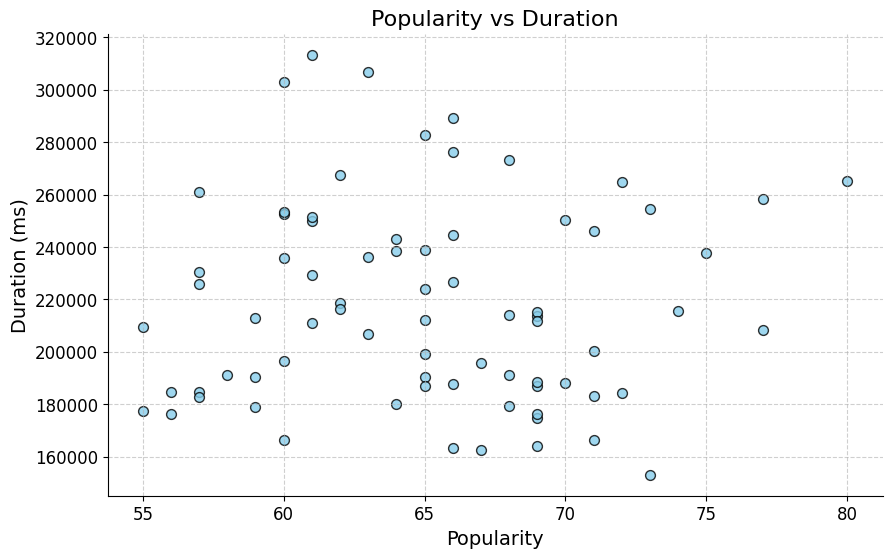

In [57]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  # Set the size of the figure

# Scatter plot
plt.scatter(data['Popularity'], data['Duration (ms)'], s=50, alpha=0.8, color='skyblue', edgecolors='k')

# Add title and labels
plt.title('Popularity vs Duration', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


In [60]:
# Function to calculate weighted popularity scores based on release date
def calculate_weighted_popularity(release_date):
    # Convert the release date to datetime object
    release_date = datetime.strptime(release_date, '%Y-%m-%d')

    # Calculate the time span between release date and today's date
    time_span = datetime.now() - release_date

    # Calculate the weighted popularity score based on time span (e.g., more recent releases have higher weight)
    weight = 1 / (time_span.days + 1)
    return weight

In [61]:
# Normalize the music features using Min-Max scaling
scaler = MinMaxScaler()
song_features = song_df[['Danceability', 'Energy',
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness']].values
song_features_scaled = scaler.fit_transform(song_features)


In [68]:
# function to get content-based recommendations based on music features
def content_based_recommendations(input_song, num_of_recom=6):
    if input_song not in song_df['Track Name'].values:
        print(f"'{input_song}' does not exist in Playlist. Please select a valid song name.")
        return

    # Fetching the index of the input song in the music DataFrame
    input_song_index = song_df[song_df['Track Name'] == input_song].index[0]

    # Calculating the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([song_features_scaled[input_song_index]], song_features_scaled)

    # Fetching the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_of_recom + 1]

    # Fetching the names of the most similar songs based on content-based filtering
    content_based_recommendations = song_df.iloc[similar_song_indices][['Track Name', 'Artists', 'Popularity']]
    return content_based_recommendations

In [69]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Fetching unique track names from the DataFrame
track_names = song_df['Track Name'].unique().tolist()

# Add default value to the track names
track_names.insert(0, "Select song from dropdown")

# Define a function to update recommendations based on dropdown selection
def update_recommendations(change):
    clear_output()  # Clear previous output
    input_song = change.new
    recommendations = content_based_recommendations(input_song, num_of_recom=5)
    print(f"Content Based recommended songs for '{input_song}':")
    display(HTML(recommendations.to_html(index=False)))

# Create dropdown widget
dropdown = widgets.Dropdown(
    options=track_names,
    description='Track Name:',
    disabled=False,
)

# Register the function to be called when dropdown value changes
dropdown.observe(update_recommendations, names='value')

# Display the dropdown
display(dropdown)


Content Based recommended songs for 'Bom Diggy Diggy':


Track Name,Artists,Popularity
Main Tera Boyfriend,"Pritam, Arijit Singh, Neha Kakkar, Meet Bros.",66
"Gali Gali (From ""Kgf Chapter 1"")","Neha Kakkar, Tanishk Bagchi",69
Tere Pyaar Mein,"Pritam, Arijit Singh, Amitabh Bhattacharya, Nikhita Gandhi",80
Nashe Si Chadh Gayi,"Vishal-Shekhar, Arijit Singh, Caralisa Monteiro, Jaideep Sahni",75
Ghungroo,"Vishal-Shekhar, Arijit Singh, Shilpa Rao, Kumaar",60


In [70]:
# a function to get hybrid recommendations based on weighted popularity
def hybrid_recommendations(input_song, num_of_recom=5, alpha=0.5):
    if input_song not in song_df['Track Name'].values:
        print(f"'{input_song}' not found in the dataset. Please enter a valid song name.")
        return

    content_based_rec = content_based_recommendations(input_song, num_of_recom)

    # Get the popularity score of the input song
    popularity_score = song_df.loc[song_df['Track Name'] == input_song, 'Popularity'].values[0]

    # Calculate the weighted popularity score
    weighted_popularity_score = popularity_score * calculate_weighted_popularity(song_df.loc[song_df['Track Name'] == input_song, 'Release Date'].values[0])

    # Combine content-based and popularity-based recommendations based on weighted popularity
    hybrid_recommendations = content_based_rec
    hybrid_recommendations = hybrid_recommendations.append({
        'Track Name': input_song,
        'Artists': song_df.loc[song_df['Track Name'] == input_song, 'Artists'].values[0],
        'Popularity': weighted_popularity_score
    }, ignore_index=True)

    # Sort the hybrid recommendations based on weighted popularity score
    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)

    # Remove the input song from the recommendations
    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track Name'] != input_song]


    return hybrid_recommendations

In [71]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Assuming 'song_df' is your DataFrame containing the data and 'content_based_recommendations' is your function for generating recommendations

# Get unique track names from the DataFrame
track_names = song_df['Track Name'].unique().tolist()

# Add default value to the track names
track_names.insert(0, "Select song from dropdown")

# display(HTML(song_df.to_html(index=False)))

# Define a function to update recommendations based on dropdown selection
def update_recommendations(change):
    clear_output()  # Clear previous output
    input_song = change.new
    recommendations = hybrid_recommendations(input_song, num_of_recom=5)
    print(f"Hybrid recommended songs for '{input_song}':")
    display(HTML(recommendations.to_html(index=False)))

# Create dropdown widget
dropdown = widgets.Dropdown(
    options=track_names,
    description='Track Name:',
    disabled=False,
)

# Register the function to be called when dropdown value changes
dropdown.observe(update_recommendations, names='value')

# Display the dropdown
display(dropdown)


Hybrid recommended songs for 'Bom Diggy Diggy':


<ipython-input-70-2f72f1115dea>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hybrid_recommendations = hybrid_recommendations.append({


Track Name,Artists,Popularity
Tere Pyaar Mein,"Pritam, Arijit Singh, Amitabh Bhattacharya, Nikhita Gandhi",80.0
Nashe Si Chadh Gayi,"Vishal-Shekhar, Arijit Singh, Caralisa Monteiro, Jaideep Sahni",75.0
"Gali Gali (From ""Kgf Chapter 1"")","Neha Kakkar, Tanishk Bagchi",69.0
Main Tera Boyfriend,"Pritam, Arijit Singh, Neha Kakkar, Meet Bros.",66.0
Ghungroo,"Vishal-Shekhar, Arijit Singh, Shilpa Rao, Kumaar",60.0
